# Part I - (Dataset Exploration: Coronary Artery Disease (CAD) Analysis)
## by (Ezealigo Uchechukwu)




## Introduction

When the heart is unable to adequately pump blood to the body, heart failure results, and coronary artery disease (CAD) is one cause of heart failure. For some persons, the clue that they have CAD is a heat attack (Lala and Desai, 2014). CAD is brought about by various factors: unhealthy lifestyle, underlying health conditions or complications such as diabetes, and birth related deformitiy, etc. We aim to use data to determine which of these factors is prevalent to CAD and heart failure.


Coronary artery diseases (CAD) Diabetes Pedigree Function indicates the function which scores the likelihood of diabetes based on family history. Age: indicates the age of the person. Outcome: indicates if the patient had a diabetes or not (1 = yes, 0 = no); we need to know the following: 

1. Lifestyle such as smoking and drinking (Hajar, 2017)
2. Health challenges: diabetes, hypertension, cardiomyopathy, etc
3. complications from ckd, acute kidney diseases
4. Blood related factor haemoglobin, leukocyte counts and platelets.



**Data source**: https://www.kaggle.com/datasets/homelysmile/datacad



**Question**

1. On gender basis, which gender is more prone to CAD?

2. How does diabetes relate to CAD in males in particular? 



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# The starting point, first load the csv file
heart = pd.read_csv('DataClean-fullage.csv')

# To have a view of the dataframe
heart.head()

,sno,age,gender,type,day_icu,outcome,smoking,alcohol,diabetes,hypertension,...,chest_infection,count,haemoglobin,anaemia,severe_anaemia,glucose,group_age,group_plate,group_leuk,group_ejectf
0,1,81,M,E,2,DISCHARGE,0,0,1,0,...,0,1,9.5,1,0,80.0,76-150,normal,high,d_normal
1,3,53,M,E,3,DISCHARGE,0,0,1,0,...,0,1,10.6,0,0,187.0,46-60,normal,high,d_normal
2,5,60,F,E,9,DISCHARGE,0,0,0,1,...,0,1,13.6,0,0,144.0,46-60,low,normal,d_normal
3,6,44,M,E,8,DISCHARGE,0,0,1,1,...,0,1,13.5,0,0,217.0,31-45,normal,high,d_normal
4,7,56,F,E,2,DISCHARGE,0,0,1,1,...,0,1,13.3,0,0,277.0,46-60,normal,high,d_normal


There was no need to tidy or change the data because the data was already clean and tidy as downloaded.

In [3]:
# To determine the number of rows and columns
heart.shape

(6611, 53)

In [4]:
# To check the completeness of the 
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6611 entries, 0 to 6610
Data columns (total 53 columns):
sno                          6611 non-null int64
age                          6611 non-null int64
gender                       6611 non-null object
type                         6611 non-null object
day_icu                      6611 non-null int64
outcome                      6611 non-null object
smoking                      6611 non-null int64
alcohol                      6611 non-null int64
diabetes                     6611 non-null int64
hypertension                 6611 non-null int64
cad                          6611 non-null int64
cardiomyopathy               6611 non-null int64
ckd                          6611 non-null int64
leuk_count                   6611 non-null float64
platelets                    6611 non-null float64
urea                         6611 non-null float64
creatinine                   6611 non-null float64
bnp                          6611 non-null float6

### Dataset structure: observation

This dataset is a clean and tidy data with 6611 observations(rows) and 53 columns.

There are both categorical and numeric features, but the categorical variables were more than a qualitative variable.

The data category that can be found include:
1. Quantitative data but discreet
2. Quantitative data but continous
3. Qualitative (categorical) data 


### What are the value counts for the patients investigated for heart disease discharged? 

In [5]:
heart.outcome.value_counts()

DISCHARGE    5582
EXPIRY        583
DAMA          446
Name: outcome, dtype: int64

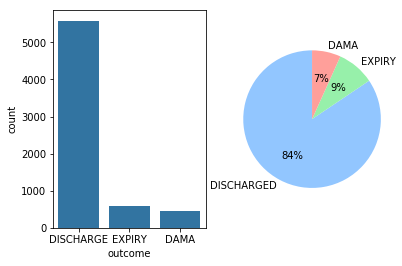

In [6]:
# plot the various outcomes from a patient's visit
plt.subplot(1, 2, 1)
colour=sb.color_palette()[0]
sb.countplot(data= heart, x='outcome', color=colour)


plt.subplot(1, 2, 2)
#define data
heart_outcome = [5582, 583, 446]
labels_heart_outcome = ['DISCHARGED', 'EXPIRY', 'DAMA']

#define Seaborn color palette to use
colors = sb.color_palette('pastel')[0:3]

#create pie chart
plt.pie(heart_outcome, labels = labels_heart_outcome, colors = colors, autopct='%.0f%%', startangle=90)
plt.axis('square')
plt.show()

A great number of the patients were discharged compared to those discharged against medical advice (DAMA) and Expiry. This may that imply that there is greater chance of survival among the various heart conditions.

### What are the likely number of days patients spend at the ICU?

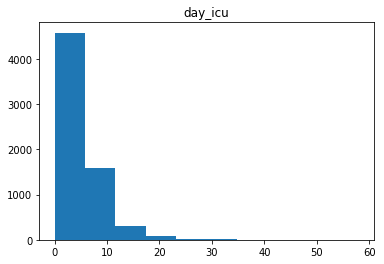

In [7]:
# plot the number of days in the icu
plt.figure(figsize = [20, 5]) 
heart.hist(column='day_icu', grid=False);

There were more patients that barely spent 24 hours in the icu during medical treatment or consultation. Only few persons spent longer days there.

In [8]:
heart.day_icu.min()

0

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
Although our major focus is on CAD, heart failure, hypertension, diabetes and cardiomyopathy. However, there are many other variables that directly or indirectly related to CAD.

These other variables are categorized into three:

1. Underlining illnesses that may be linked to Coronary artery disease (CAD) and heart failure include: cardiomyopathy, chronic kidney disease (CKD), stable angina, atypical chest pain, acute kidney, congenital, urinary tract infection, pulmonary embolism, chest infection

2. Lifestyle: smoking and alcohol
    
3. Blood related issues such as haemoglobin, anaemia and severe anaemia.


**Among these variables, we shall concentrate on the connection between CAD and diabetes**

###  Drop the unwanted variables: working with refined dataset

In [9]:
# Not all the columns or variables will be of interest in this investigation.

variable_drop = ['sno', 'count', 'alcohol', 'haemoglobin', 'type', 'ckd', 'atypical_chest_pain', 'leuk_count', 'platelets', 'smoking','urinary_tract', 'urea', 'creatinine', 'bnp', 'acute_kidney', 'congenital', 'anaemia', 'chest_infection','severe_anaemia','raised_cardiac', 'eject_fraction', 'stable_angina', 'acs', 'count','stemi', 'hfref','hfnef',
                 'valvular', 'chb', 'sick_sinus', 'atrial_fibril', 'cva_infract', 'cva_bleed','ventricular', 'psvt', 'neuro_cardiogenic_syncope', 
                 'orthostatic', 'infective_endocarditis', 'deep_venous', 'group_age', 'group_plate', 'group_leuk',
                 'group_ejectf']

In [10]:
# Using .drop to drop unwanted columns 
df=heart.drop(axis=1, index=None, columns=variable_drop, level=None, inplace=False, errors='raise')
df.head()

,age,gender,day_icu,outcome,diabetes,hypertension,cad,cardiomyopathy,heart_failure,pulmonary_embolism,glucose
0,81,M,2,DISCHARGE,1,0,0,0,1,0,80.0
1,53,M,3,DISCHARGE,1,0,1,0,1,0,187.0
2,60,F,9,DISCHARGE,0,1,0,1,0,0,144.0
3,44,M,8,DISCHARGE,1,1,1,1,1,0,217.0
4,56,F,2,DISCHARGE,1,1,1,1,1,0,277.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6611 entries, 0 to 6610
Data columns (total 11 columns):
age                   6611 non-null int64
gender                6611 non-null object
day_icu               6611 non-null int64
outcome               6611 non-null object
diabetes              6611 non-null int64
hypertension          6611 non-null int64
cad                   6611 non-null int64
cardiomyopathy        6611 non-null int64
heart_failure         6611 non-null int64
pulmonary_embolism    6611 non-null int64
glucose               6611 non-null float64
dtypes: float64(1), int64(8), object(2)
memory usage: 568.2+ KB


In [12]:
df.describe()

,age,day_icu,diabetes,hypertension,cad,cardiomyopathy,heart_failure,pulmonary_embolism,glucose
count,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000
mean,63.991075,4.857056,0.319921,0.510513,0.697171,0.224626,0.477840,0.015429,171.856436
std,12.865395,4.354418,0.466481,0.499927,0.459516,0.417367,0.499546,0.123260,90.174224
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
25%,56.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,108.000000
50%,65.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,142.000000
75%,73.000000,6.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,210.000000
max,110.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,809.000000


In [13]:
# To make a copy of df dataframe
dfC= df.copy()

In [14]:
dfC.sample(3)

,age,gender,day_icu,outcome,diabetes,hypertension,cad,cardiomyopathy,heart_failure,pulmonary_embolism,glucose
2758,72,F,2,DISCHARGE,1,1,1,0,0,0,171.0
3675,74,M,2,EXPIRY,0,1,1,0,1,0,196.0
1166,72,F,2,DISCHARGE,0,0,1,0,0,0,92.0


### What type of distribution does the patients' age have?

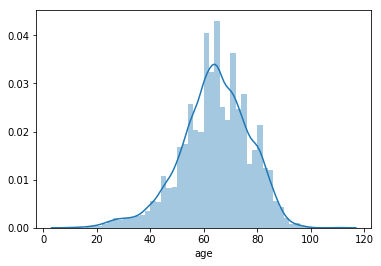

In [15]:
# To view the distribution of age
sb.distplot(dfC['age'])

The age distribution is left skewed. This means that the patients from 75 years and below make up more of the population.

In [16]:
dfC.age.min()

10

### What is the glucose concentration distribution like?

<function matplotlib.pyplot.xticks(*args, **kwargs)>

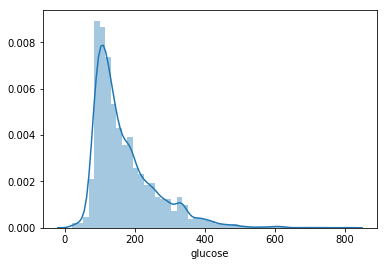

In [17]:
# histogram plot showing the distribution of glucose
sb.distplot(dfC['glucose'])
plt.xticks

The glucose concentration is rightly skewed, tending towards increased glucose concentration.

In [18]:
dfC.glucose.min()

22.0

### What are the number of patients with heart related issues?

In [19]:
#define data
def pie_chart(dfC_name, column_name):
    x2= dfC_name[column_name].value_counts()
    labels2 = dfC_name[column_name].value_counts().index
    #define Seaborn color palette to use
    colors = sb.color_palette('pastel')[0:2]
    #create pie chart
    plt.pie(x2, labels = labels2, colors = colors, autopct='%.0f%%', startangle=90)
    plt.axis('square')
    plt.show()

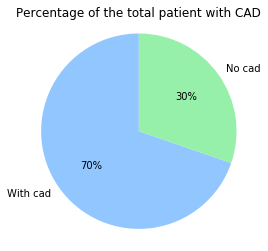

In [20]:
dfC['cad']= dfC['cad'].replace({1: 'With cad', 0: 'No cad'})
plt.title('Percentage of the total patient with CAD')
pie_chart(dfC, 'cad')

There are more patients with CAD. There are 70% of the patients investigated with CAD and 30% without CAD.

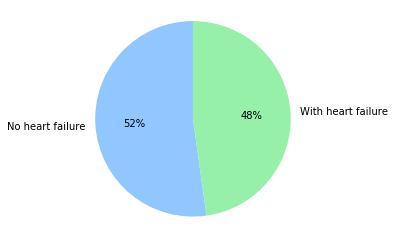

In [21]:
dfC['heart_failure'] = dfC['heart_failure'].replace({1: 'With heart failure', 0: 'No heart failure'})
pie_chart(dfC, 'heart_failure')

Patients (both male and female) that have experienced heart failure are 48%, hence, majority of the patients interviewed have not had heart failure.

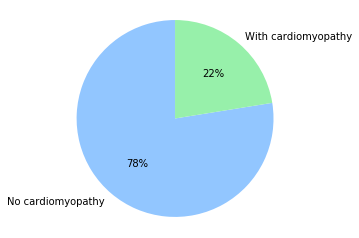

In [22]:
dfC['cardiomyopathy'] = dfC['cardiomyopathy'].replace({1: 'With cardiomyopathy', 0: 'No cardiomyopathy'})
pie_chart(dfC, 'cardiomyopathy')

More interestingly, fewer patients, 22%, have had a record of cardiomyopathy

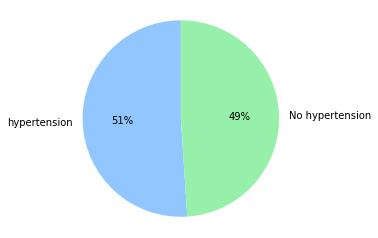

In [23]:
dfC['hypertension'] = dfC['hypertension'].replace({1: 'hypertension', 0: 'No hypertension'})
pie_chart(dfC, 'hypertension')

In [24]:
51% of the patients are hypertensive.

SyntaxError: invalid syntax (<ipython-input-24-ee82b23ca4b7>, line 1)

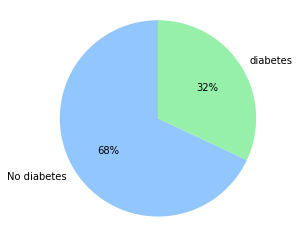

In [25]:
dfC['diabetes'] = dfC['diabetes'].replace({1: 'diabetes', 0: 'No diabetes'})
pie_chart(dfC, 'diabetes')

Unlike hypertension, most patients are non-diabetic

### Categorizing patients investigated based on gender?

In [26]:
# value count for gender: male and female
dfC['gender'].value_counts()

M    4032
F    2579
Name: gender, dtype: int64

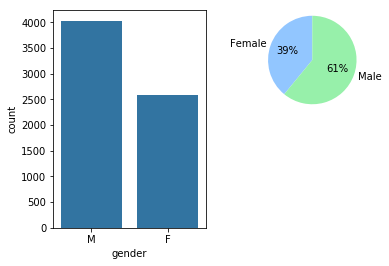

In [27]:
plt.subplot(1, 2, 1)
# plot of the value count for gender
sb.countplot(data= dfC, x='gender', color=colour)

plt.subplot(2, 2, 2)
#define data
data4 = [165256, 257787]
labels4 = ['Female', 'Male']

#define Seaborn color palette to use
colors = sb.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data4, labels = labels4, colors = colors, autopct='%.0f%%', startangle=90)
plt.axis('square')
plt.show()

Gender
1. There are more males than females
2. The data accounts for 61% male and 39% female

### Among the patients investigated, who are those with CAD?

In [28]:
#From the dataframe obtained after the drop, we want to select the patients with CAD
df.sample(3)

,age,gender,day_icu,outcome,diabetes,hypertension,cad,cardiomyopathy,heart_failure,pulmonary_embolism,glucose
3681,67,M,2,DISCHARGE,0,1,1,0,0,0,186.0
1888,70,M,2,DISCHARGE,0,1,0,0,0,0,138.0
1174,53,M,0,DISCHARGE,0,0,0,0,0,0,205.0


In [29]:
# selecting patients with CAD
cad_patients= df[df['cad']== 1]
cad_patients.head()

,age,gender,day_icu,outcome,diabetes,hypertension,cad,cardiomyopathy,heart_failure,pulmonary_embolism,glucose
1,53,M,3,DISCHARGE,1,0,1,0,1,0,187.0
3,44,M,8,DISCHARGE,1,1,1,1,1,0,217.0
4,56,F,2,DISCHARGE,1,1,1,1,1,0,277.0
5,52,M,11,EXPIRY,1,1,1,0,1,0,263.0
10,65,M,4,EXPIRY,0,0,1,0,1,0,152.0


In [30]:
# to know the number of rows and columns
cad_patients.shape

(4609, 11)

### Which gender have CAD the more?

In [31]:
# To know the number of males and females with CAD 
cad_patients.gender.value_counts()

M    2879
F    1730
Name: gender, dtype: int64

Out of 6611 patients, 4609 of these patients have CAD. Among these CAD patients, the male gender are more than the female.

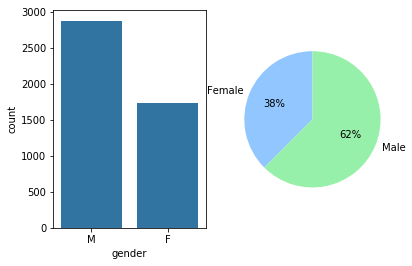

In [32]:
# plot the gender with CAD
plt.subplot(1, 2, 1)
sb.countplot(data= cad_patients, x='gender', color=colour)

plt.subplot(1, 2, 2)
#define data
data_1 = [1730,2879]
labels_1 = ['Female', 'Male']

#define Seaborn color palette to use
colors = sb.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data_1, labels = labels_1, colors = colors, autopct='%.0f%%', startangle=90)
plt.axis('square')
plt.show()

The number of females with CAD (38%) is less compared to that of the males (62%)

### Based on gender, what is the number of patient with CAD that has certain health condition?

In [33]:
# To determine the aggregate sum of the variables for those with CAD according to gender
gender_based_issues= pd.pivot_table(df, index= 'gender', aggfunc=sum)
gender_based_issues

,age,cad,cardiomyopathy,day_icu,diabetes,glucose,heart_failure,hypertension,pulmonary_embolism
gender,,,,,,,,,
F,165258,1730,498,12752,870,462015.0,1279,1443,42
M,257787,2879,987,19358,1245,674127.9,1880,1932,60


Compared to females, the males far outweighs the females with CAD that have other health challenges.Since male data superceeds that of the females, we therefore focuses on the male gender only.

### On gender, sufferer, and non-sufferer basis, what are the value count for heart related conditions?

In [34]:
# This is to view the frequency of the counts
df.groupby(['gender', 'cad', 'heart_failure', 'cardiomyopathy', 'hypertension']).size()

gender  cad  heart_failure  cardiomyopathy  hypertension
F       0    0              0               0               325
                                            1                65
                            1               0                34
                                            1                16
             1              0               0               203
                                            1                42
                            1               0               140
                                            1                24
        1    0              0               0               177
                                            1               596
                            1               0                26
                                            1                61
             1              0               0               171
                                            1               502
                            1               0  

In [35]:
# Make a copy of the original df dataframe
df_copy = df.copy(deep=True)

In [36]:

# Create a dataframe for the specific heart issues
heart_issues_df= df_copy[['gender', 'cad', 'heart_failure', 'cardiomyopathy', 'hypertension']]
heart_issues_df.head()

,gender,cad,heart_failure,cardiomyopathy,hypertension
0,M,0,1,0,0
1,M,1,1,0,0
2,F,0,0,1,1
3,M,1,1,1,1
4,F,1,1,1,1


In [37]:
# Generate a pivot table
heart_issues_1= pd.pivot_table(heart_issues_df, index= 'gender', aggfunc=sum)
heart_issues_1

,cad,cardiomyopathy,heart_failure,hypertension
gender,,,,
F,1730,498,1279,1443
M,2879,987,1880,1932


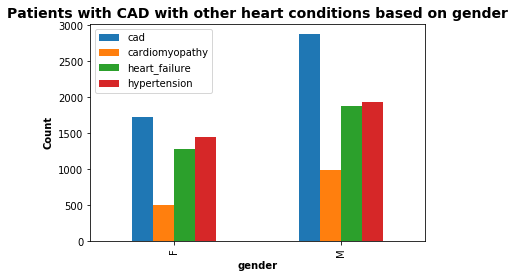

In [38]:
# Plot a bar graph
heart_issues_1.plot(kind='bar', stacked=False)


plt.title("Patients with CAD with other heart conditions based on gender",
                fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel("gender",fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel("Count",
               fontsize = 10, weight = "bold");

In males, the competition between heart failure and hypertension is higher than as seen in females.Also, males have more CAD compared to other related health conditions than females.

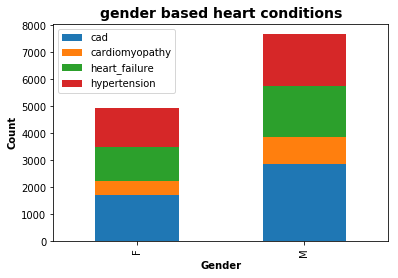

In [39]:
# plot a stacked bar chart
heart_issues_1.plot(
        kind='bar',
        stacked=True)

plt.title("gender based heart conditions",
                 fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel("Gender",fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel("Count",
               fontsize = 10, weight = "bold");

### Narrowing the dataset to the male gender

In [40]:
# To select only the male gender
Men= df_copy[df_copy['gender']== 'M']
Men.head()

,age,gender,day_icu,outcome,diabetes,hypertension,cad,cardiomyopathy,heart_failure,pulmonary_embolism,glucose
0,81,M,2,DISCHARGE,1,0,0,0,1,0,80.0
1,53,M,3,DISCHARGE,1,0,1,0,1,0,187.0
3,44,M,8,DISCHARGE,1,1,1,1,1,0,217.0
5,52,M,11,EXPIRY,1,1,1,0,1,0,263.0
6,54,M,1,DISCHARGE,0,0,0,0,0,0,92.0


### What percentage of men has CAD?

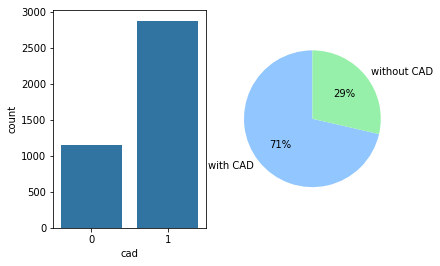

In [41]:
plt.subplot(1, 2, 1)
sb.countplot(data= Men, x='cad', color=colour)

plt.subplot(1, 2, 2)
data_men_cad = [2879, 1153]
labels_men_cad = ['with CAD', 'without CAD']

#define Seaborn color palette to use
colors = sb.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data_men_cad, labels = labels_men_cad, colors = colors, autopct='%.0f%%', startangle=90)
plt.axis('square')
plt.show()


Among the men investigated, 71% have CAD. Thats is quite high.

### What is the connection between men with CAD and other health condition? 

#### A function for Generating Pivot tables

In [42]:
# select only the males with CAD
Men_cad= Men.query('cad ==1')
Men_cad.head()

,age,gender,day_icu,outcome,diabetes,hypertension,cad,cardiomyopathy,heart_failure,pulmonary_embolism,glucose
1,53,M,3,DISCHARGE,1,0,1,0,1,0,187.0
3,44,M,8,DISCHARGE,1,1,1,1,1,0,217.0
5,52,M,11,EXPIRY,1,1,1,0,1,0,263.0
10,65,M,4,EXPIRY,0,0,1,0,1,0,152.0
12,63,M,0,DISCHARGE,1,1,1,0,1,0,141.0


#### A function for plotting grouped bar graph

In [43]:
# Create a pivot table function
def pivot_table(Men_cad, column_name):
  return pd.pivot_table(Men_cad, index= column_name, aggfunc=sum)

In [44]:
# To create a dataframe with for men with CAD with other and heart condition/complications
Men_cad_Comp = Men_cad[['cad', 'diabetes', 'heart_failure', 'cardiomyopathy', 'hypertension']]
Men_cad_Comp.head()

,cad,diabetes,heart_failure,cardiomyopathy,hypertension
1,1,1,1,0,0
3,1,1,1,1,1
5,1,1,1,0,1
10,1,0,1,0,0
12,1,1,1,0,1


In [45]:
#pivot_table for men with CAD
Men_cad_PVT = pivot_table(Men_cad_Comp, 'cad')
Men_cad_PVT

,cardiomyopathy,diabetes,heart_failure,hypertension
cad,,,,
1,599,959,1304,1732


In [46]:
# Create a function for plotting grouped bar chart
def bar_graph(pivot_table, column_name):
  # Plot a bar graph
  pivot_table.plot(kind='bar', stacked=False)

  plt.title(column_name.title(),
                fontsize = 14, weight = "bold")
  # Add x label and format it
  plt.xlabel(column_name.title(),fontsize = 10, weight = "bold")
  # Add y label and format it
  plt.ylabel("Count", fontsize = 10, weight = "bold");

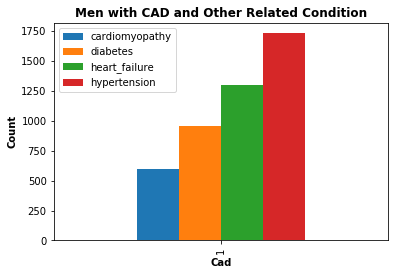

In [47]:
bar_graph(Men_cad_PVT, 'cad')
plt.title('Men with CAD and Other Related Condition', weight='bold');

This reveals that the number of male patient with cad but have other complications shows that hypertension takes the lead, followed by men who has experienced heart failure, and may have diabetes. The least among these complications is cardiomyopathy.

### Streamlining to Men with CAD and diabetes

In [48]:
# to select the men with CAD and diabetes 
Men_cad_dbt= Men.query('cad ==1 & diabetes ==1')
Men_cad_dbt.head()

,age,gender,day_icu,outcome,diabetes,hypertension,cad,cardiomyopathy,heart_failure,pulmonary_embolism,glucose
1,53,M,3,DISCHARGE,1,0,1,0,1,0,187.0
3,44,M,8,DISCHARGE,1,1,1,1,1,0,217.0
5,52,M,11,EXPIRY,1,1,1,0,1,0,263.0
12,63,M,0,DISCHARGE,1,1,1,0,1,0,141.0
16,55,M,5,DISCHARGE,1,0,1,0,0,0,269.0


In [49]:
# This is to view the frequency of the counts
Men_cad_dbt.groupby(['heart_failure', 'cardiomyopathy', 'hypertension']).size()

heart_failure  cardiomyopathy  hypertension
0              0               0               142
                               1               282
               1               0                36
                               1                48
1              0               0                95
                               1               189
               1               0                70
                               1                97
dtype: int64

In [50]:
# To create a dataframe with CAD and diabetes with other heart condition
Men_cad_dbt_df = Men_cad_dbt[['cad', 'diabetes','heart_failure', 'cardiomyopathy', 'hypertension']]
Men_cad_dbt_df.head()

,cad,diabetes,heart_failure,cardiomyopathy,hypertension
1,1,1,1,0,0
3,1,1,1,1,1
5,1,1,1,0,1
12,1,1,1,0,1
16,1,1,0,0,0


In [51]:
#pivot_table(df, column_name)
cad_pivot_table = pivot_table(Men_cad_dbt_df, ['cad','diabetes'])
cad_pivot_table

,,cardiomyopathy,heart_failure,hypertension
cad,diabetes,,,
1,1,251,451,616


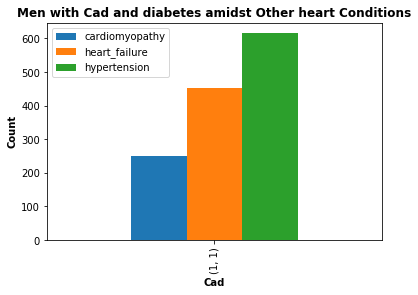

In [52]:
bar_graph(cad_pivot_table, 'cad')
plt.title('Men with Cad and diabetes amidst Other heart Conditions', weight='bold');

The men with both CAD(denoted by = '1') and Diabetes (also denoted by = '1'), are more hypertensive, than heart failure and cardiomyopathy 

### How does having both hypertension and diabetes influence CAD and other heart conditions?

In [53]:
Men_hyp_dbt= Men.query('hypertension ==1 & diabetes ==1')
Men_hyp_dbt.head()

,age,gender,day_icu,outcome,diabetes,hypertension,cad,cardiomyopathy,heart_failure,pulmonary_embolism,glucose
3,44,M,8,DISCHARGE,1,1,1,1,1,0,217.0
5,52,M,11,EXPIRY,1,1,1,0,1,0,263.0
12,63,M,0,DISCHARGE,1,1,1,0,1,0,141.0
13,80,M,0,DISCHARGE,1,1,0,0,0,0,173.0
18,66,M,2,DISCHARGE,1,1,1,0,0,0,184.0


In [54]:
# This is to view the frequency of the counts
Men_hyp_dbt.groupby(['cad','heart_failure', 'cardiomyopathy']).size()

cad  heart_failure  cardiomyopathy
0    0              0                  38
                    1                   8
     1              0                  28
                    1                  24
1    0              0                 282
                    1                  48
     1              0                 189
                    1                  97
dtype: int64

In [55]:
# To create a dataframe with hypertension and diabetes with other heart condition
Men_hyp_dbt_df = Men_hyp_dbt[['cad','heart_failure', 'cardiomyopathy', 'diabetes','hypertension']]
Men_hyp_dbt_df.head()

,cad,heart_failure,cardiomyopathy,diabetes,hypertension
3,1,1,1,1,1
5,1,1,0,1,1
12,1,1,0,1,1
13,0,0,0,1,1
18,1,0,0,1,1


In [56]:
#pivot_table hypertension and diabetes(df, column_name)
hyp_dbt_pivot_table = pivot_table(Men_hyp_dbt_df, ['hypertension','diabetes'])
hyp_dbt_pivot_table

,,cad,cardiomyopathy,heart_failure
hypertension,diabetes,,,
1,1,616,177,338


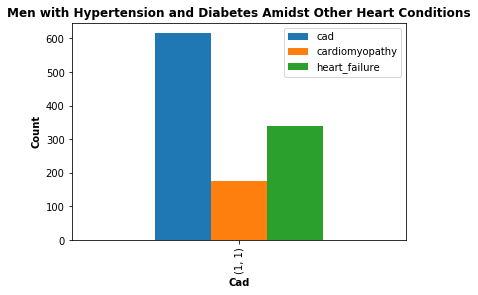

In [57]:
bar_graph(hyp_dbt_pivot_table, 'cad')
plt.title('Men with Hypertension and Diabetes Amidst Other Heart Conditions', weight='bold');

### The number of men discharged compared to DAMA and Expiry

In [58]:
Men_cad.outcome.value_counts()

DISCHARGE    2523
EXPIRY        188
DAMA          168
Name: outcome, dtype: int64

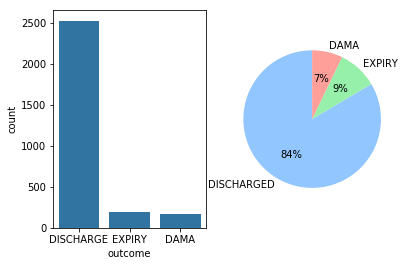

In [59]:
plt.subplot(1, 2, 1)
sb.countplot(data= Men_cad, x='outcome', color=colour)

plt.subplot(1, 2, 2)
#define data
data_outcome = [3367, 376, 289]
labels_outcome = ['DISCHARGED', 'EXPIRY', 'DAMA']

#define Seaborn color palette to use
colors = sb.color_palette('pastel')[0:3]

#create pie chart
plt.pie(data_outcome, labels = labels_outcome, colors = colors, autopct='%.0f%%', startangle=90)
plt.axis('square')
plt.show()

### Are there outliers in the age distribution of men?

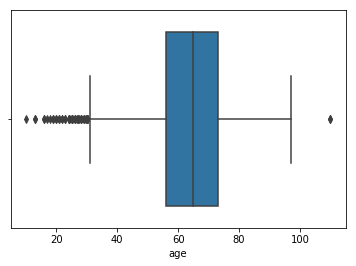

In [60]:
# To plot a box plot
# To have a clear view of the outlier
sb.boxplot(Men['age'])

There are some outliers in the age column of this dataset, however, it can not be dropped because children and older adult may have or not have any of the heart related issues. Hence, in the following session we may likely categorize age to have a better picture.

### Categorizing the male gender by age

In [61]:
# To make a copy of the male dataframe
Male = Men.copy()

In [62]:
# for weight-Bin edges that will be used to "cut" the data into groups
# Fill in this list with seven values 
bin_edges = [1, 24, 44, 60, 75, 90, 110] 

In [63]:
#The age categorization was performed according to Dyussenbayev, A. (2017)

# Labels for the four height level groups
bin_names = ['Juvenile', 'Young', 'Middle','Elderly', 'Senile', 'Long-liver'] # Name each height level category

In [64]:
# Creates height_levels column
Male['age_cat']= pd.cut(Male.age, bin_edges, labels=bin_names)

In [65]:
# To categorize the selected data using groupby
cat_age= Male.groupby('age_cat', axis=0, level=None, as_index=False, sort=True).sum()
cat_age

,age_cat,age,day_icu,diabetes,hypertension,cad,cardiomyopathy,heart_failure,pulmonary_embolism,glucose
0,Juvenile,457,141,0,1,3,3,10,2,2345.9
1,Young,9395,1173,37,42,103,59,80,10,33520.7
2,Middle,66804,5591,380,571,884,307,537,19,211290.7
3,Elderly,120689,8521,619,915,1344,478,881,26,310217.1
4,Senile,57791,3794,203,390,527,134,356,3,113547.6
5,Long-liver,2651,138,6,13,18,6,16,0,3205.9


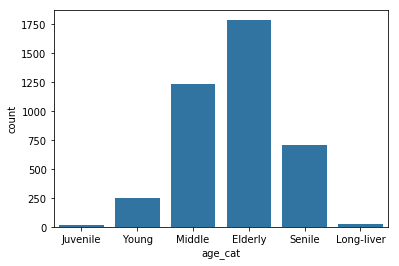

In [66]:
# plotting the age category for all the patient investigated
color=sb.color_palette()[0]
sb.countplot(data= Male, x= 'age_cat', color=color);

There more peaople within the elderly age and middle age categories in this investigation than the senile, young, juvenile and long livers.

### Glucose versus diabetes in Men

### What is the relationship between age and blood glucose concentration?

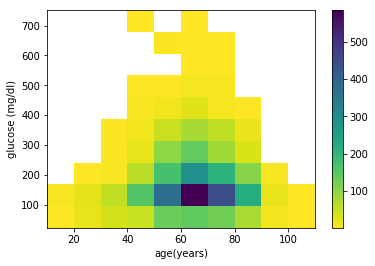

In [67]:
# plot a heat plot of age and glucose
plt.hist2d(data = Male, x = 'age', y = 'glucose', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('age(years)')
plt.ylabel('glucose (mg/dl)');


At the 60-70 years, have their glucose concentration between 100-200 mg/dL. Here, heat plot was used to see that some male patients within the same age bracket have their have their blood glucose at higher levels than 200 mg/dL.

### What is the relationship between age and number of days in the icu?

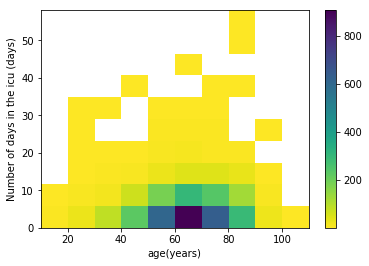

In [68]:
# plot a heat plot of age and glucose
plt.hist2d(data = Male, x = 'age', y = 'day_icu', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('age(years)')
plt.ylabel('Number of days in the icu (days)');

Men at age 50-70 years are likely to spent about 5-10 days in the icu

### Based on the age category, what is the distribution of the blood glucose?

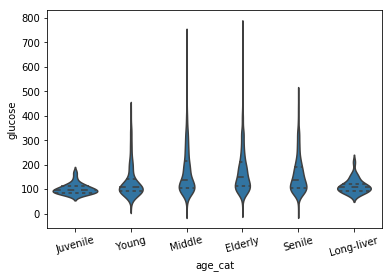

In [69]:
# make a violin plot of glucose based on the age category
base_color = sb.color_palette()[0]
sb.violinplot(data=Male, x='age_cat', y='glucose', color=base_color, inner='quartile')
plt.xticks(rotation=15);

The juveniles and long livers have their blood glucose concentration slightly below the 200 mg/dL while the young, middle, elderly and senile are above 200 mg/dL. The blood glucose concentration for other age category follows this decreaseing order: elderly, middle, senile and young.

### What is the comparison of a glucose distribution among the variable (diabetes)

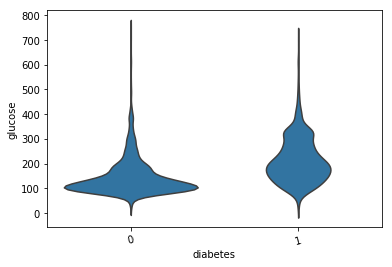

In [70]:
# To create a violin plot of glucose based on those with or without diabetes
base_color = sb.color_palette()[0]
sb.violinplot(data=Male, x='diabetes', y='glucose', color=base_color, inner=None)
plt.xticks(rotation=15);

The group with zero diabetes have their blood glucose concentration largely around 100 mg/dL while the diabetics are quite above the 100 mg/dL.

(-0.52208167483228396, 1.5220816748322841)

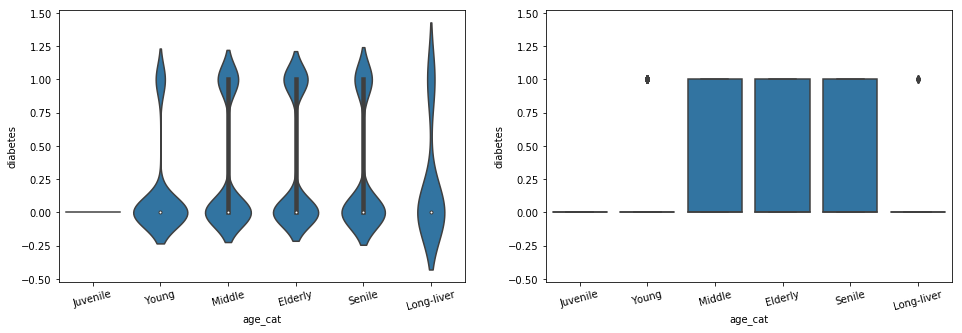

In [71]:
# to make a subplot (violin and boxplot) of diabetes versus age category
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=Male, x='age_cat', y='diabetes', color=base_color)
plt.xticks(rotation=15);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=Male, x='age_cat', y='diabetes', color=base_color)
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

It was observed that the middle, elderly and senile have glucose concentrations much likely to be high, thus tends to be diabetic.

### What connection does age categories have with the number of days in the intensive care unit (icu)

### Which age category has more stay in the icu? 

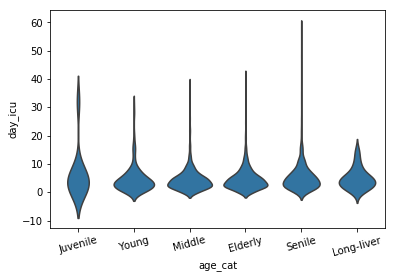

In [72]:
#To create a violin plot of the age category and their respective days spent in the icu
base_color = sb.color_palette()[0]
sb.violinplot(data=Male, x='age_cat', y='day_icu', color=base_color, inner=None)
plt.xticks(rotation=15);

The middle age, elderly and senile spend quite a number of days in the icu but may be for reasons beyond heart related challenge. 

### How does blood glucose concentration affect the men with or without CAD based on age category?

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


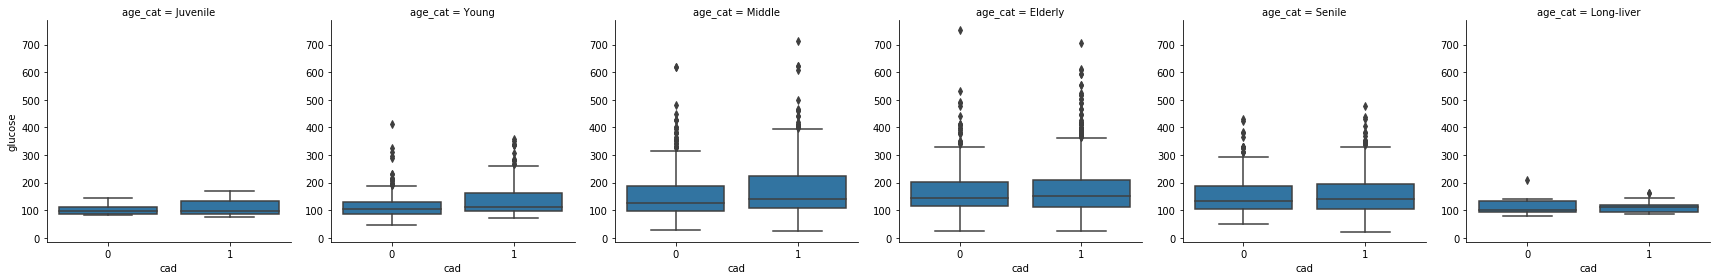

In [73]:
# plot cad vs blood glucose concentration based on age category
g = sb.FacetGrid(data = Male, col = 'age_cat', size = 4)
g.map(sb.boxplot, 'cad', 'glucose')

The glucose concentration for the middle aged, elderly, and senile men was high for those with cad compared to the juveniles, young and long livers with or without CAD. 

### Is there a connection with the number of days in the icu and men with or without CAD based on age category?

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


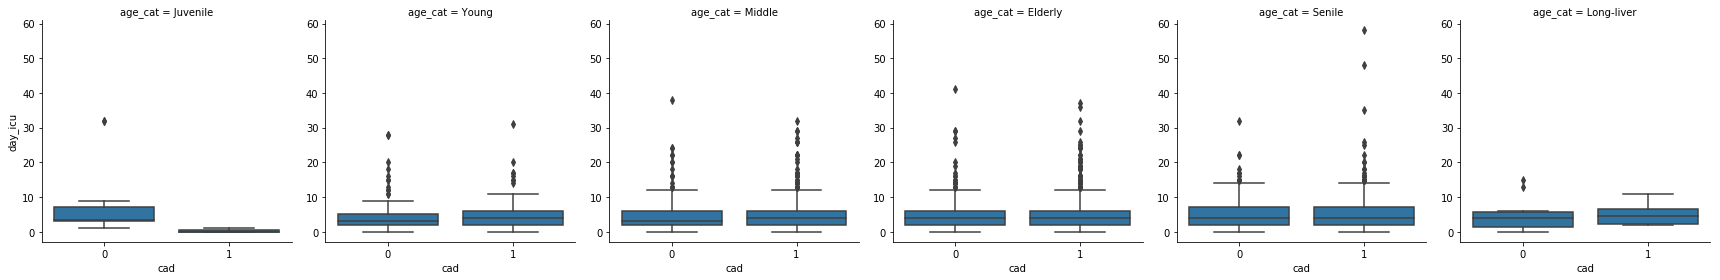

In [74]:
# plot cad vs number of days in the icu based on age category
g = sb.FacetGrid(data = Male, col = 'age_cat', size = 4)
g.map(sb.boxplot, 'cad', 'day_icu')

Any man at any age category with or without CAD can spend similar number of days in the icu except for the juveniles with CAD.

### How does males with or without CAD and diabetes relate based on age categories?

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


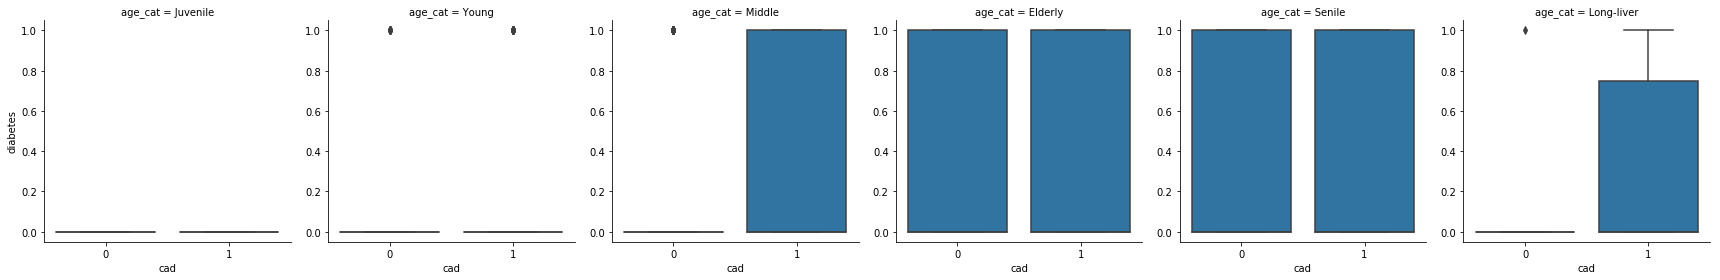

In [75]:
# plot diabetes vs cad based on age category
g = sb.FacetGrid(data = Male, col = 'age_cat', size = 4)
g.map(sb.boxplot, 'cad', 'diabetes')

The juveniles and the young have no report of CAD and diabetes while the middle, elderly, senile and long livers are diabetic. Although, there are males in the elderly and senile categories that do not have CAD but are diabetic while in both the middle and long livers, there males that do not have both CAD and diabetes.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


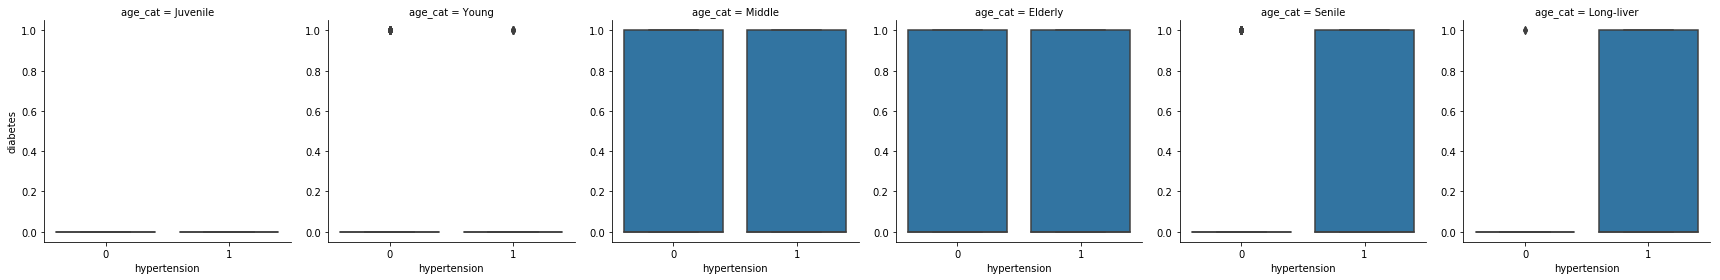

In [76]:
# plot diabetes vs cad based on age category
g = sb.FacetGrid(data = Male, col = 'age_cat', size = 4)
g.map(sb.boxplot, 'hypertension', 'diabetes')

The juveniles and the young have no report of hypertension and diabetes while the middle, elderly, senile and long livers are diabetic and hypertensive. Also, the elderly and elderly can be diabetic and not hypertensive. Similarly, there can be diabetic males without hypertension in males of senile and long liver category.
 

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


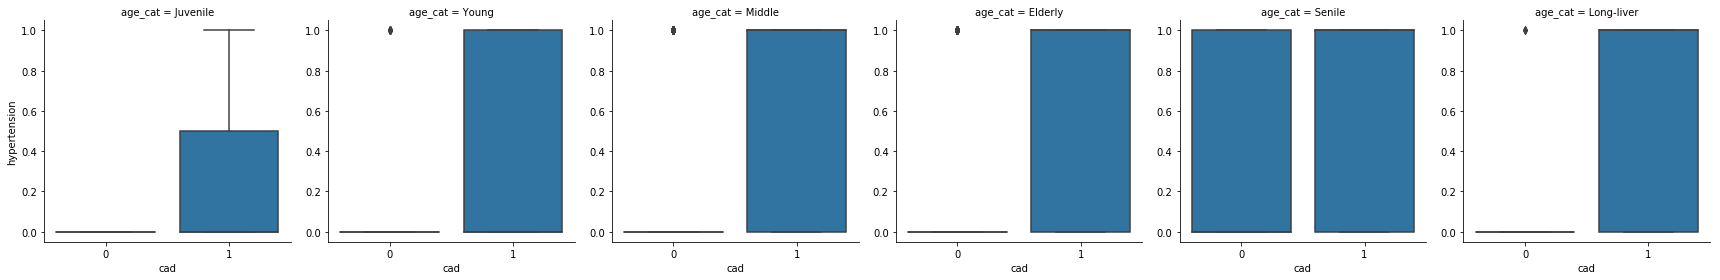

In [77]:
# plot diabetes vs cad based on age category
g = sb.FacetGrid(data = Male, col = 'age_cat', size = 4)
g.map(sb.boxplot, 'cad', 'hypertension')

Every male with CAD is hypertensive but its degree is lower in juveniles. But the Senile with no cad can also be hypertensive.

### To re-save the male version of the original dataset

In [89]:
Men.to_csv('Male.csv', index=False)

In [90]:
# To check the newly saved data
Male.head()

,age,gender,day_icu,outcome,diabetes,hypertension,cad,cardiomyopathy,heart_failure,pulmonary_embolism,glucose,age_cat
0,81,M,2,DISCHARGE,1,0,0,0,1,0,80.0,Senile
1,53,M,3,DISCHARGE,1,0,1,0,1,0,187.0,Middle
3,44,M,8,DISCHARGE,1,1,1,1,1,0,217.0,Young
5,52,M,11,EXPIRY,1,1,1,0,1,0,263.0,Middle
6,54,M,1,DISCHARGE,0,0,0,0,0,0,92.0,Middle


## Conclusions

1.	Having CAD is not a dead sentence, many of the patients were DISCHARGED compared to DAMA and EXPIRY.
2.	However, most of the sufferers of CAD are males than females. 70% males and 30% females.
3.	Among the male patients, 70% had CAD while 48% have heart failure and 22% cardiomyopathy.
4.	Age is one critical factor ask the middle-aged and the elderly men are more prone to having CAD, the age range of men susceptible to cad is 44-75 years.
5.	Diabetic and hypertensive patients are more prone to having CAD, and patients with diabetes and CAD may like stay longer in the ICU.



### References

1. Lala A, Desai AS. The role of coronary artery disease in heart failure. Heart Fail Clin. 2014 Apr;10(2):353-65. doi: 10.1016/j.hfc.2013.10.002. PMID: 24656111.

2. Hajar R. Risk Factors for Coronary Artery Disease: Historical Perspectives. Heart Views. 2017 Jul-Sep;18(3):109-114. doi: 10.4103/HEARTVIEWS.HEARTVIEWS_106_17. PMID: 29184622; PMCID: PMC5686931

3. Dyussenbayev, A. (2017). Age Periods Of Human Life. Advances in Social Sciences Research Journal, 4(6). https://doi.org/10.14738/assrj.46.2924

4. Date received: 9 May 1990 but downloaded on 21 July 2022